In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load our data from the csv file
df = pd.read_csv('/content/raw_data.csv')

# **Understanding the Data**
The first step in the analysis is to get a **quick overview** of the dataset structure and contents.

**Key Questions Explored:**

* What are the **column names**?
* What **types of data** are included (numerical, categorical, etc.)?
* What features are available besides the **target variable `Price`**?

👀 **What We Did:**
We used `df.head()` to preview the first few rows of the dataset.
This helps form an **initial connection** with the data and guides the direction for **cleaning, exploration, and modeling**.

In [ ]:
# head data
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## **Initial Observations**
After reviewing the first few rows of the dataset, here are some key takeaways:

**Target Variable:**

* `price` is the main target we aim to predict using regression models.

**Temporal Insight:**

* The `date` column shows when each house was sold — this could offer time-based trends or be used to engineer features like `year_sold`.

**Physical Features:**

* Numerical columns like `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, and `yr_built` reflect the structural characteristics of each property.

**Encoded Categoricals:**

* Columns such as `waterfront`, `view`, and `condition` are numerically encoded but likely represent categorical data — they may need reformatting.

**Location Info:**

* Fields like `street`, `city`, `statezip`, and `country` provide geographic context.
* The `street` column may be too granular (free text) to use directly without cleaning or feature extraction.

**Conclusion:**
The dataset is **rich, well-structured**, and suitable for **predictive modeling**.
Next, we’ll examine **data types** and check for **missing values** to prepare for deeper exploration.


# **General Overview of the Dataset**

In this step, I used the `df.info()` function to review the overall structure of the dataset.

🔍 **What This Reveals:**

* **Data types** for each column (e.g., `int64`, `float64`, `object`)
* **Number of non-null entries**, helping to spot missing values
* **Memory usage** and the total number of features

**Why It Matters:**
This overview is essential for planning the **data cleaning** process.
It highlights:

* Columns with **missing values**
* Features that may need **type conversion** or **transformation**

Next, I’ll dive deeper into **missing data handling** and begin preparing the dataset for analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
print("Missing values:")
print(df.isnull().sum())
print("\nDuplicate values:",df.duplicated().sum())

Missing values:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Duplicate values: 0


## **Dataset Structure & Data Types**

The dataset consists of **4,600 rows** and **18 columns**.
Using `df.info()`, I confirmed that there are **no missing values** as well as **no-duplicated Values**, which is a great starting point for modeling.

**Key Observations:**

* **Object (Text) Columns:**
  `date`, `street`, `city`, `statezip`, and `country` are of type `object`.
  → These will need **preprocessing** (e.g., parsing or encoding) before modeling.

* **Year Columns:**
  `yr_built` and `yr_renovated` are numeric, but they may be better treated as **temporal** or **categorical** features.

* **Numeric Features:**
  Columns like `price`, `bedrooms`, `bathrooms`, and `sqft_living` are proper numeric types and **ready for regression**.

* **Categorical-Encoded as Numeric:**
  `waterfront`, `view`, and `condition` are numeric but represent **categories**, so converting them to categorical types may improve model interpretability.

**Overall:**
The dataset is **clean**, **well-structured**, and mostly ready for feature engineering and modeling.
Next, I’ll explore **descriptive statistics** to better understand feature distributions and detect any irregularities.

## **Statistical Summary of Numerical Features**

To get a quick overview of the dataset's numerical columns, I used the `df.describe()` function.

🔎 **What It Shows:**

* **Mean** and **median (50%)** — help understand central tendency
* **Standard deviation (std)** — shows how spread out the values are
* **Min and max** — highlight the range of each feature
* **25% and 75% quartiles** — useful for identifying skewness and potential outliers

**Why It Matters:**

These summaries help:

* Spot features with **wide ranges** or **high variability**
* Detect **skewed distributions**
* Identify where **outlier handling** may be needed

This is a key step in preparing for deeper **exploratory data analysis** and eventual **feature engineering**.


In [ ]:
# statistical summery
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## **My Observations from Statistical Summary**

After reviewing `df.describe()`, here are the key takeaways:

* **Price** has a minimum of 0, which might be a missing or incorrect entry. The max price is very high (26M), suggesting strong outliers.
* **sqft\_living**, **sqft\_lot**, and **sqft\_basement** are right-skewed — their max values are far above the median.
* **Bedrooms** shows a minimum of 0 — possibly invalid, since a house with no bedrooms is rare or unrealistic.
* **Bathrooms** also includes 0 values. I’ll explore how frequent these are and whether they need cleaning.
* **yr\_renovated** has a median of 0, indicating most homes weren’t renovated. This column can be transformed into a binary feature like `has_been_renovated`.
* **Floors** appears normal, ranging between 1 and 3.5.
* **Waterfront**, **view**, and **condition** are numeric but represent categories — they’ll be converted during preprocessing.

**Next Steps:**
I’ll explore outliers visually and run a correlation analysis to better understand relationships between features and price.

# Exploratory Data Analysis (EDA)

Before modeling, it’s essential to explore the data to uncover useful patterns and relationships. In this section, I’ll focus on:

* **Distribution Analysis**
  Visualizing key numerical features like `price`, `bedrooms`, and `sqft_living` to spot skewness and extreme values.

* **Outlier Detection**
  Identifying unusually high or low values that may distort the model’s performance.

* **Feature vs. Target Trends**
  Examining how `price` varies with features like `condition`, `city`, or `sqft_living` to evaluate potential predictors.

* **EDA Insights for Feature Engineering**
  Using visual trends and relationships to guide the creation or transformation of features.

These steps will help shape a cleaner, more effective dataset and inform decisions on preprocessing and modeling strategies.

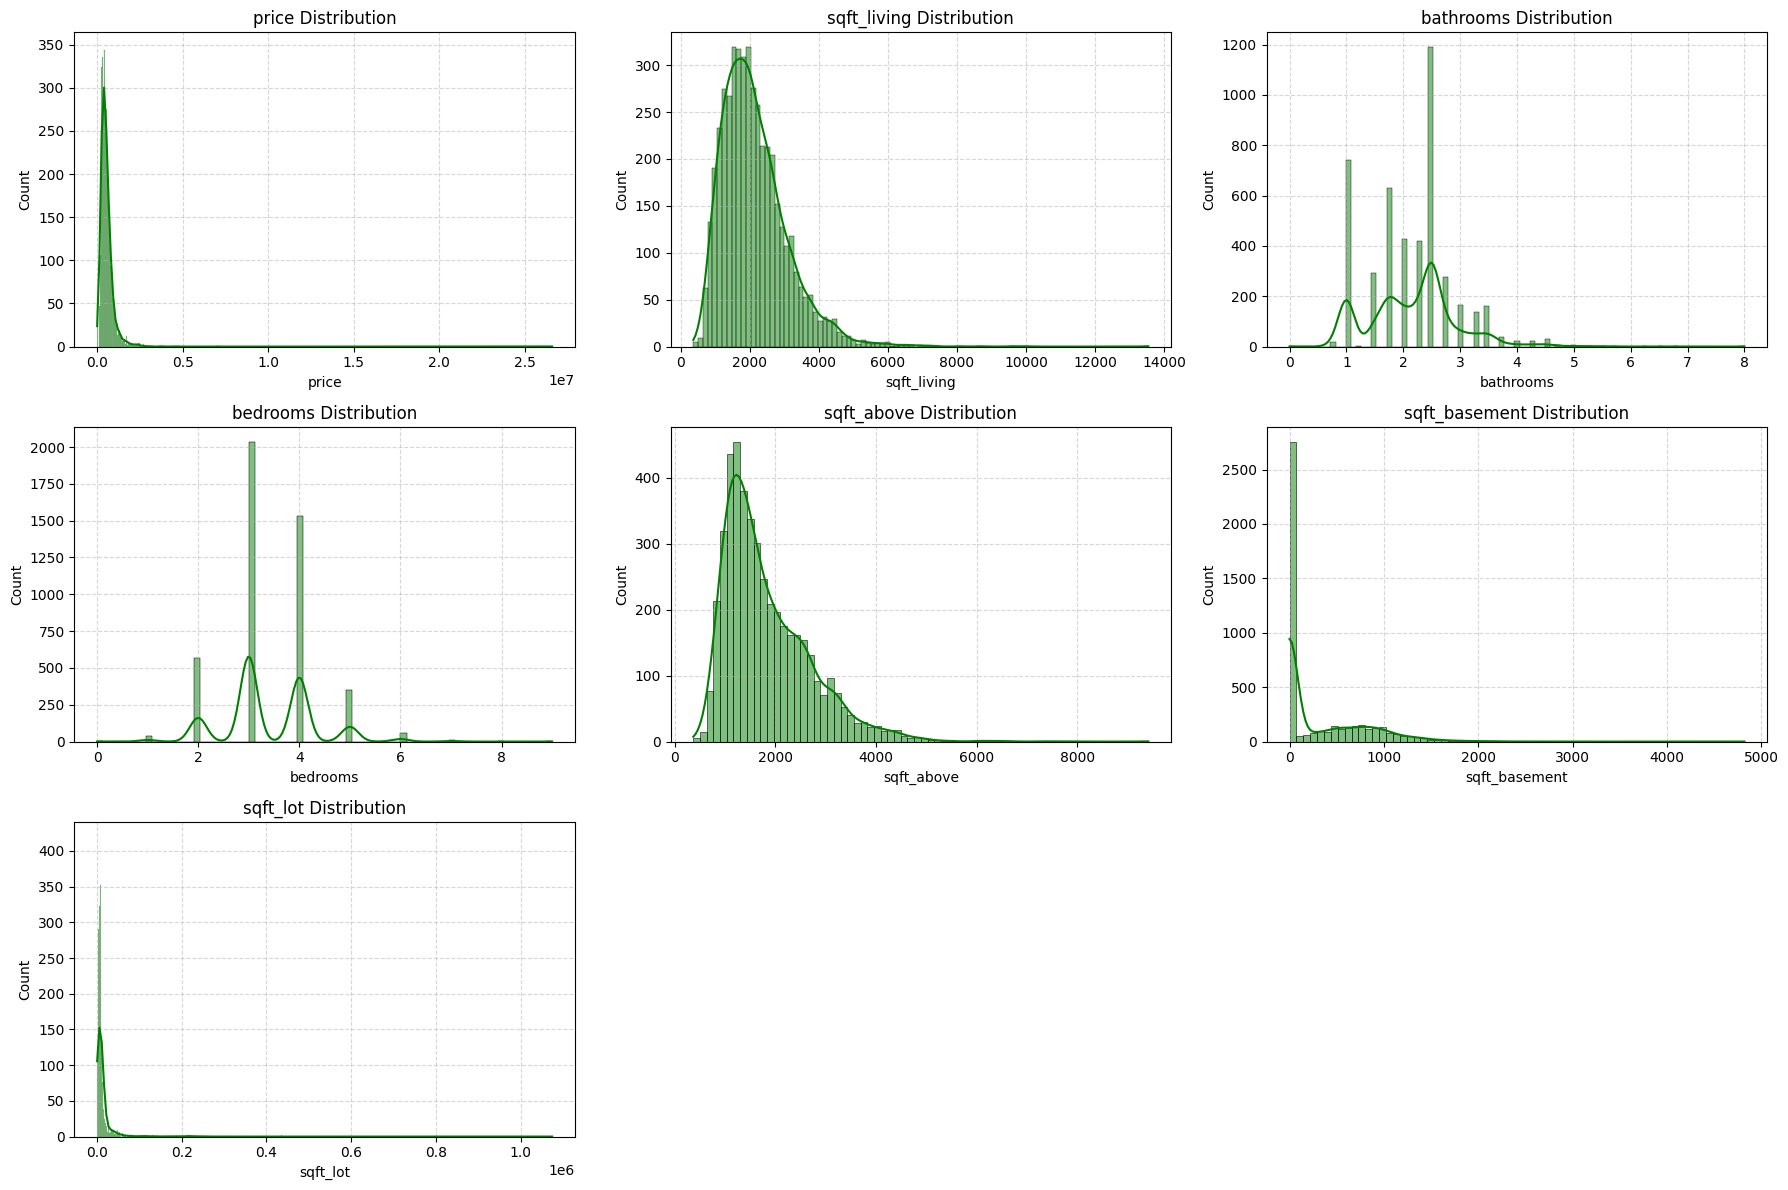

In [ ]:
# List of features to plot
features = ['price', 'sqft_living', 'bathrooms', 'bedrooms',
            'sqft_above', 'sqft_basement', 'sqft_lot']

# Set up the subplot grid (3 rows x 3 columns to fit 7 plots neatly)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot distributions
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='green')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hide unused subplots (if any)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

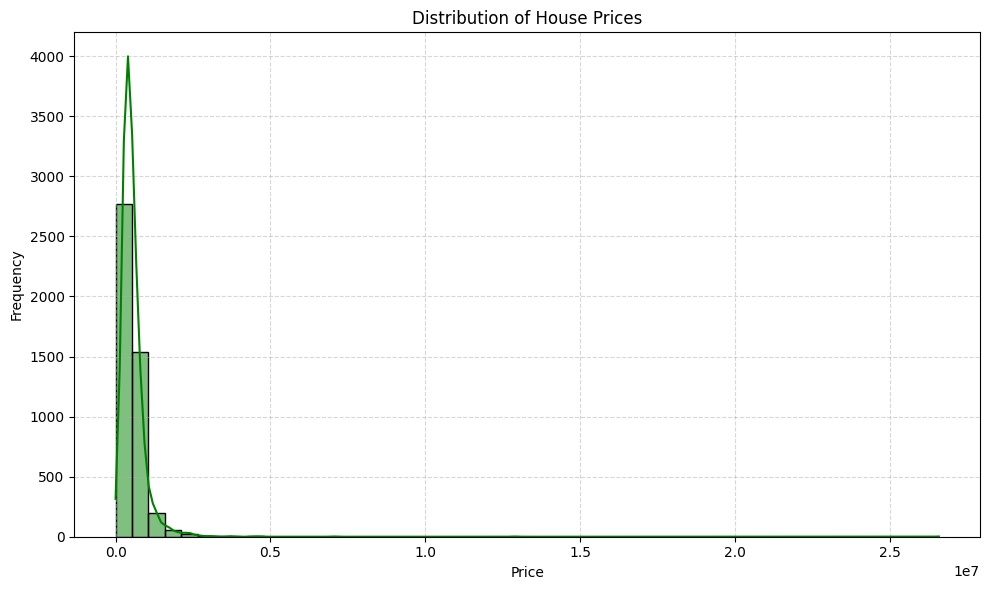

In [ ]:
# distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='green')
# adding title and labals
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Analysis of Distribution Plot

When I looked at the price distribution before any cleaning or transformation, I immediately noticed how **heavily right-skewed** the data is.

Most houses are priced under **$1 million**, but there are a few extremely expensive properties that stretch the scale way to the right. Because of this, it's kind of hard to see the real pattern in the majority of the data.

This tells me two things:

- I probably need to handle outliers before modeling, so they don’t dominate the results.
- And maybe also apply a log transformation to normalize the target and make it easier for regression models to learn.
  
So, this plot helped me understand that the raw price values might cause problems later if I don't clean or transform them properly.

## Number of Bedrooms and Bathrooms

/tmp/ipython-input-3954979208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='bedrooms', data=df, palette='Greens_d')
/tmp/ipython-input-3954979208.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='bathrooms', data=df, palette='Set2')


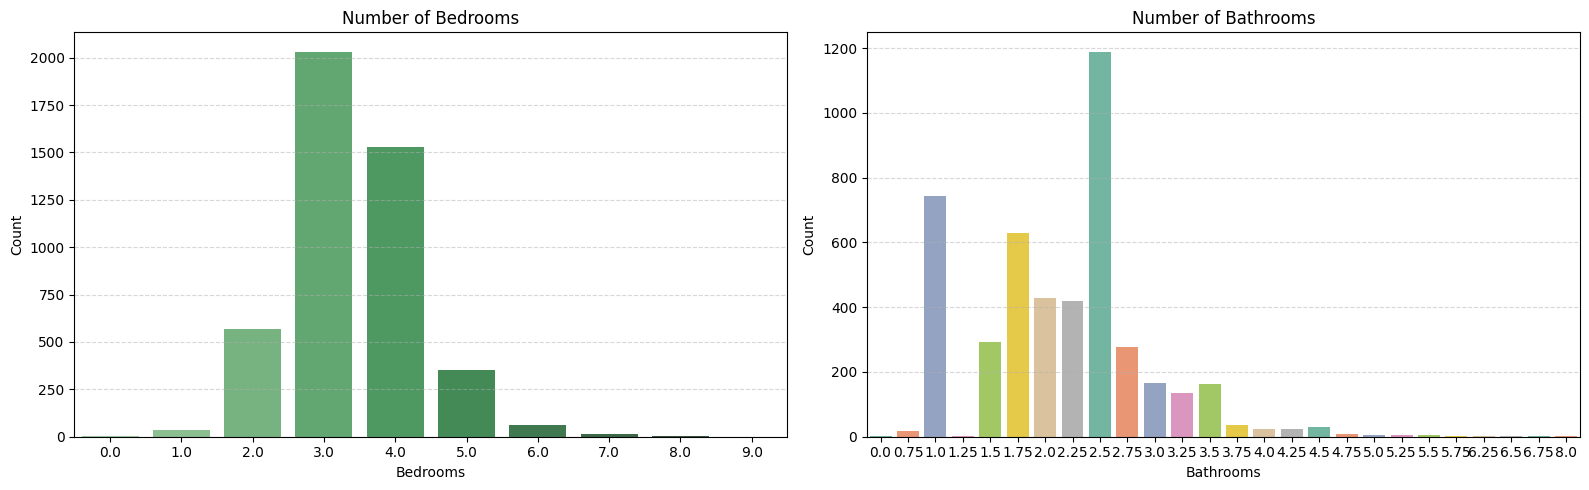

In [ ]:
# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns

# First plot: Number of Bedrooms
sns.countplot(ax=axes[0], x='bedrooms', data=df, palette='Greens_d')
axes[0].set_title("Number of Bedrooms")
axes[0].set_xlabel("Bedrooms")
axes[0].set_ylabel("Count")
axes[0].grid(axis='y', linestyle="--", alpha=0.5)

# Second plot: Number of Bathrooms
sns.countplot(ax=axes[1], x='bathrooms', data=df, palette='Set2')
axes[1].set_title("Number of Bathrooms")
axes[1].set_xlabel("Bathrooms")
axes[1].set_ylabel("Count")
axes[1].grid(axis='y', linestyle="--", alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

### Bedrooms & Bathrooms – Distribution Overview

* **Bedrooms**:
  Most homes have **3 or 4 bedrooms**, which aligns with typical family homes.
  A few listings show **0 or 1 bedroom** — possibly studios or data issues.
  Houses with **6+ bedrooms** are rare and may be outliers.

* **Bathrooms**:
  The common range is **1.0 to 2.5 baths**, with **2.5** being most frequent — likely a mix of full and half baths.
  Values like **1.75** or **2.25** suggest detailed bath setups.
  Listings with **6 or more bathrooms** are uncommon and likely high-end properties.

**Modeling Note**:
To simplify the data and reduce noise, grouping extreme or unusual values may improve model stability.



## Price vs Condition

/tmp/ipython-input-1306753824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='price', data=df, palette='coolwarm')


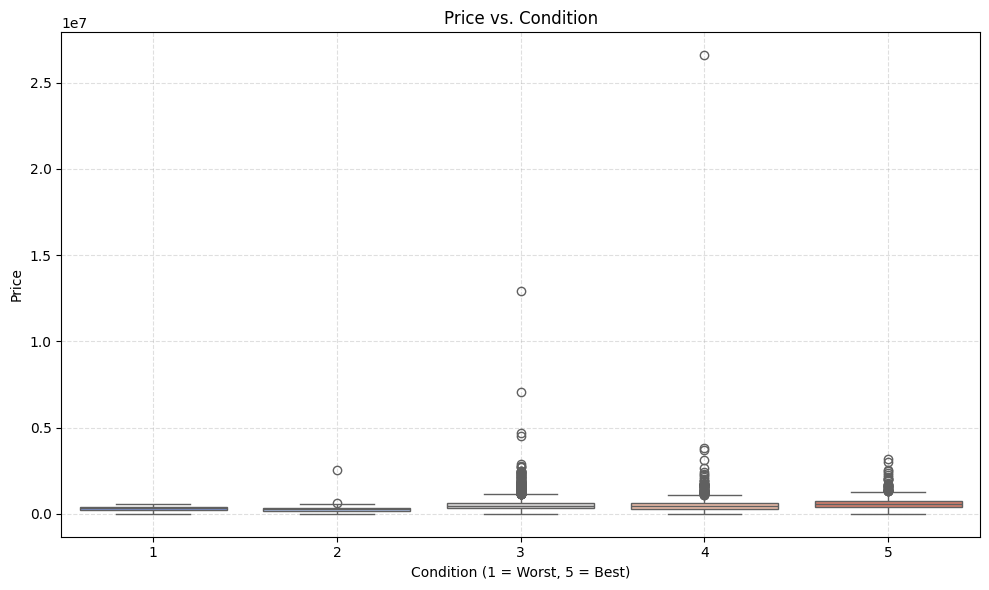

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df, palette='coolwarm')
plt.title("Price vs. Condition")
plt.xlabel("Condition (1 = Worst, 5 = Best)")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

### Price vs. Condition – Boxplot Insight

* Houses with **better condition (4 or 5)** show **slightly higher median prices**, but overall, **price ranges overlap** across all condition levels.
* There are **many outliers**, especially in **condition 3 and 4**, with some extremely high prices that can **skew the results**.

**Overall**:
**Condition alone** isn’t a strong price predictor. It likely adds more value when **combined with other features** like size, location, or renovation status.


/tmp/ipython-input-1007771260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities, palette='Greens_d')


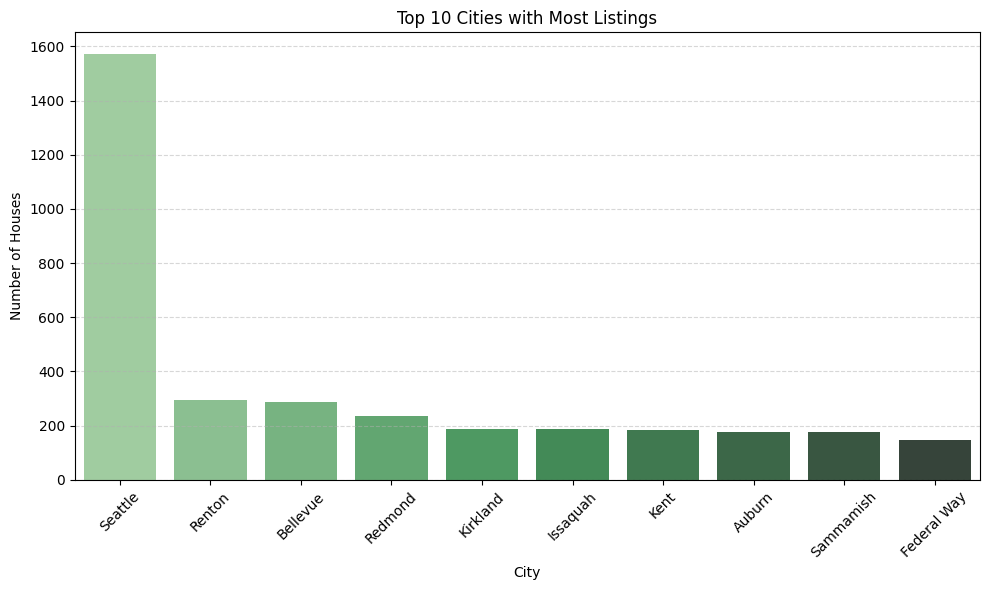

In [ ]:
plt.figure(figsize=(10, 6))
top_cities = df['city'].value_counts().nlargest(10).index
sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities, palette='Greens_d')
plt.title("Top 10 Cities with Most Listings")
plt.xlabel("City")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

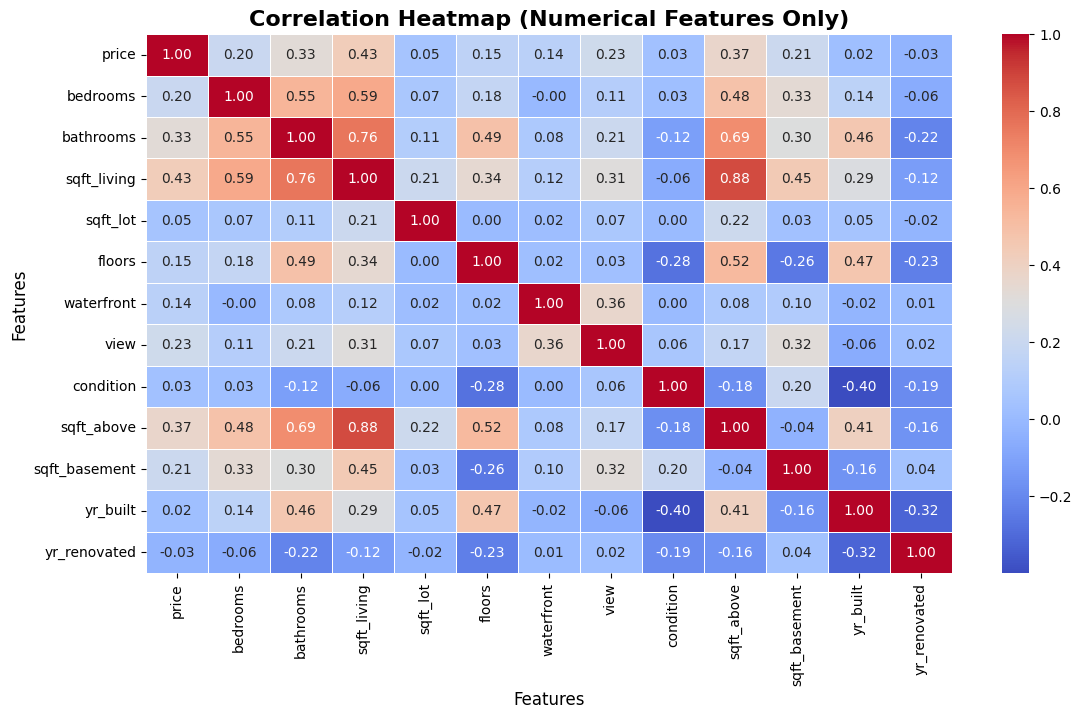

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Set figure size for better readability
plt.figure(figsize=(13, 7))

# Create a heatmap with improved styling
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adding a title with emphasis
plt.title("Correlation Heatmap (Numerical Features Only)", fontsize=16, fontweight='bold')

# Improving axis labels for clarity
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Displaying the final plot
plt.show()

### Analysis Correlation

#### Key Insights

The heatmap shows how different numerical features relate to **price**.

* **sqft\_living** has the **strongest correlation (0.43)** — larger living space tends to mean higher price.
* **bathrooms**, **sqft\_above**, and **sqft\_basement** also have **moderate correlations**, making them solid picks for modeling.
* **bedrooms**, **view**, and **floors** show **weaker but still useful** relationships.
* Features like **sqft\_lot** and **condition** have **very weak correlations** and may not help much in prediction.

For modeling, I’ll **focus on the stronger features** and keep an eye on **multicollinearity**, especially between **sqft\_living** and **sqft\_above**.


# Outlier Detection and Removal

To make the model more stable and accurate, we used the **IQR method** to detect and remove **extreme values** from key numerical features.

**Why IQR?**

IQR is a reliable way to spot outliers by looking at values outside the range:

**Q1 - 1.5×IQR** and **Q3 + 1.5×IQR**

This helps reduce the impact of extreme data points that can distort model results.

**Features Cleaned:**

* **price** – Removed overpriced listings far outside the normal range.
* **sqft\_living** – Filtered homes with extremely large living areas.
* **bathrooms**, **bedrooms**, **sqft\_above**, **sqft\_basement**, **sqft\_lot** – Cleaned unusual or excessive values.

**Result:**
Outlier removal made the dataset **more consistent and less noisy**, helping the model focus on **real patterns** instead of extreme cases.

In [ ]:

print(f"Original dataset shape: {df.shape}")

def remove_outliers(df, x):
    # Set Limits
    # q25 => Frist Quatile and q75=> Third Quatile
    q25, q75 = np.percentile(df[x], 25), np.percentile(df[x], 75)
    # interQuatile range
    iqr = q75 - q25
    cut_off = iqr * 1.5
    # lower and upper bonds
    lower, upper = 1 ,  (q75 + cut_off)
    df = df[(df[x] < upper) & (df[x] > lower)]
    print('Outliers of "{}" are removed'.format(x))
    return df

df = remove_outliers(df, 'price')
df = remove_outliers(df, 'sqft_lot')
print(f"After removing outliers from dataset shape: {df.shape}")

Original dataset shape: (4600, 18)
Outliers of "price" are removed
Outliers of "sqft_lot" are removed
After removing outliers from dataset shape: (3809, 18)


## **Outlier Removal – IQR Method Summary**
To improve model **stability** and **accuracy**, we used the **IQR method** to remove outliers from key numerical features of two columns.

**Features Cleaned:**

* **price** – Removed extremely high-priced homes.
* **sqft\_lot** – Removed properties with oversized lot areas.

**Results:**

* **791 outliers removed**
* Dataset reduced from **4600 → 3809 rows**
* Data is now **cleaner, more consistent**, and better suited for modeling.

This step helps the model learn from meaningful patterns without being skewed by extreme values.

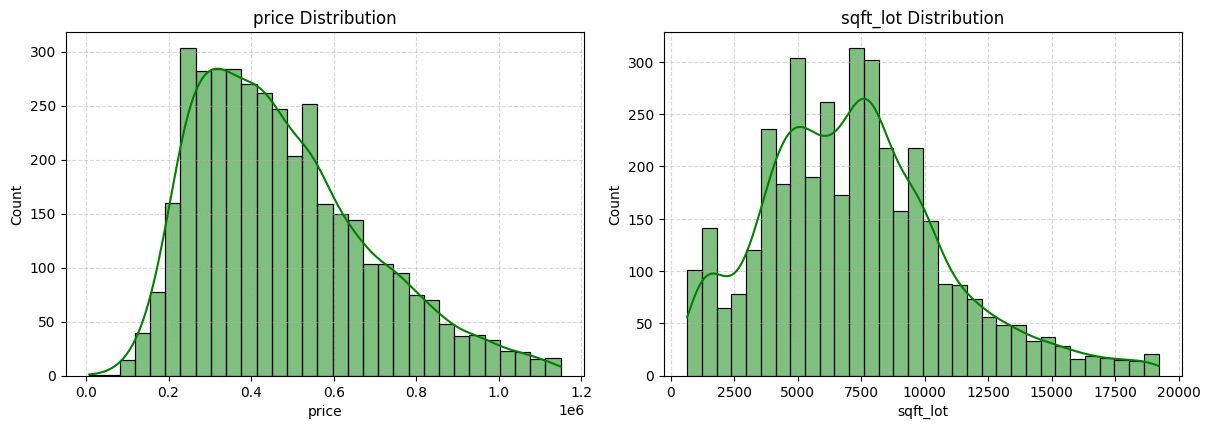

In [ ]:
# List of features to plot
features = ['price', 'sqft_lot']

# Set up the subplot grid (3 rows x 3 columns to fit 7 plots neatly)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot distributions
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='green')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hide unused subplots (if any)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Feature Engineering

To help the model learn more effectively, we **created new features** and **removed less useful ones**.

**New Features Added:**

* **year\_sold** – Extracted from the `date` column.
* **house\_age** – Calculated as `year_sold - yr_built`.
* **has\_been\_renovated** – Binary flag showing if the house was ever renovated.

**Columns Removed:**

* `date`, `yr_renovated`, `yr_built`, `street`, and `country` were dropped due to being **irrelevant**, **redundant**, or **hard to use directly**.

These changes aim to keep the data **clean, meaningful**, and more useful for prediction.

In [ ]:
# Extract year from date
df['year_sold'] = pd.to_datetime(df['date']).dt.year

In [ ]:
# Create house age
df['house_age'] = df['year_sold'] - df['yr_built']

In [ ]:
# Create binary renovation flag
df['has_been_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Drop unnecessary columns
df.drop(['date', 'yr_renovated', 'yr_built', 'street', 'country'], axis=1, inplace=True)

# Show updated DataFrame
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,year_sold,house_age,has_been_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,WA 98133,2014,59,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,WA 98042,2014,48,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,WA 98008,2014,51,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,WA 98052,2014,38,1
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,WA 98115,2014,76,1


**After Feature Engineering – Summary**
The dataset is now **cleaner and more informative**, with helpful new features and unnecessary columns removed.

**New Features Added:**

* **year\_sold** – Extracted from `date`.
* **house\_age** – Difference between `year_sold` and `yr_built`.
* **has\_been\_renovated** – Binary: 1 if renovated, 0 otherwise.

**Dropped Columns:**

* `date`, `yr_renovated`, `yr_built`, `street`, and `country` – removed due to being redundant or not useful.

**Why Keep the `city` Column?**

* **City** captures important location-based differences in house prices.
* It’s easier to **encode** than `street`, which has too many unique values.
* Unlike `country` (which had only one value), `city` adds real predictive value.
* Helps the model **learn local market patterns** without adding noise.

The dataset is now **better structured for encoding and modeling**.


# **Data Preprocessing**
Before training, we prepared the data with encoding, scaling, and a proper train/test split to ensure **consistency and model readiness**.

**Key Steps:**

* **Encoding** – Applied **One-Hot Encoding** to convert categorical features (e.g., `city`, `statezip`, `condition`, `view`) into numerical format.
* **Scaling** – Normalized numerical features to help models learn more effectively.
* **Train/Test Split** – Split the dataset into **80% training** and **20% testing** for fair evaluation.

**How it’s done:**
Used **`ColumnTransformer`** and **`Pipeline`** to apply all preprocessing steps in a **clean and consistent** way across different models.

The data is now fully prepped and ready for modeling.

In [ ]:
# Target & Features
X = df.drop("price", axis=1)
y = df["price"]

In [ ]:
# Split data (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Numerical and categorical features
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                    'sqft_above', 'sqft_basement', 'house_age']
categorical_features = ['waterfront', 'view', 'condition', 'city', 'statezip', 'has_been_renovated']

In [ ]:
# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)